# **Step 1: Data Preprocessing**

Before diving into the statistical analysis, ensure that the data is clean and ready for analysis.

In [17]:
#Load the required libraries
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, f_oneway
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the Dataset and Data Cleaning
df = pd.read_csv('/content/India.csv')
df.head()

,date,confirmed,vaccines,people_vaccinated,people_fully_vaccinated,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,contact_tracing,facial_coverings
0,22-01-2020,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23-01-2020,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,24-01-2020,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25-01-2020,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,26-01-2020,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,1.0,1.0,0.0


In [4]:
# Get a summary of the dataset
print("\nSummary of the dataset:")
print(df.info())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 779 non-null    object 
 1   confirmed                            771 non-null    float64
 2   vaccines                             779 non-null    float64
 3   people_vaccinated                    408 non-null    float64
 4   people_fully_vaccinated              379 non-null    float64
 5   school_closing                       773 non-null    float64
 6   workplace_closing                    769 non-null    float64
 7   cancel_events                        769 non-null    float64
 8   gatherings_restrictions              773 non-null    float64
 9   transport_closing                    769 non-null    float64
 10  stay_home_restrictions               769 non-null    float64
 11  interna

In [5]:
# Statistical summary of numerical columns
print("\nStatistical summary of numerical columns:")
print(df.describe())


Statistical summary of numerical columns:
          confirmed  vaccines  people_vaccinated  people_fully_vaccinated  \
count  7.710000e+02     779.0       4.080000e+02             3.790000e+02   
mean   1.697753e+07       0.0       4.567081e+08             2.639955e+08   
std    1.471401e+07       0.0       3.441271e+08             2.637703e+08   
min    1.000000e+00       0.0       0.000000e+00             7.668000e+03   
25%    2.241874e+06       0.0       1.260910e+08             4.177513e+07   
50%    1.096339e+07       0.0       4.355768e+08             1.519088e+08   
75%    3.275341e+07       0.0       7.819688e+08             4.757035e+08   
max    4.298426e+07       0.0       9.679468e+08             8.058866e+08   

       school_closing  workplace_closing  cancel_events  \
count      773.000000         769.000000     769.000000   
mean        -0.869340          -1.802341      -0.479844   
std          2.427125           1.460395       1.817858   
min         -3.000000      

In [6]:
#Convert NaN's to 0/ Null values
df = df.fillna(0)
df.head()

,date,confirmed,vaccines,people_vaccinated,people_fully_vaccinated,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,contact_tracing,facial_coverings
0,22-01-2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23-01-2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,24-01-2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25-01-2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,26-01-2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,1.0,1.0,0.0


# **Step 2: Exploratory Data Analysis (EDA)**

Performing EDA helps to understand the data and identify any patterns or anomalies.


**2.1 Time Series Analysis**

Visualize the daily COVID-19 cases over time.

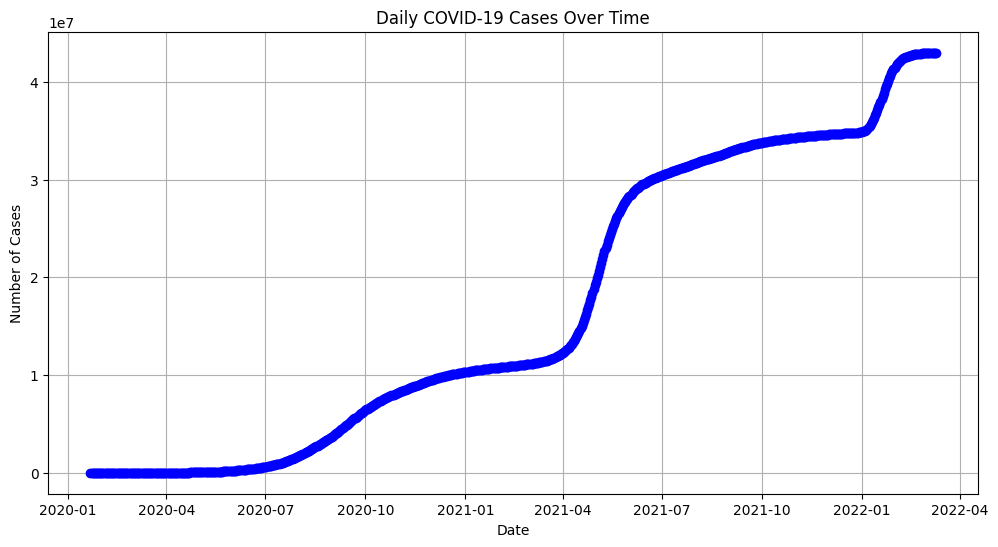

In [8]:
# Convert the date column to datetime format (if applicable)
df['date'] = pd.to_datetime(df['date'])

# Plot daily cases over time
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['confirmed'], color='blue', marker='o', linestyle='-')
plt.title('Daily COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.show()

**2.2 Distribution of Lockdown Measures**

Examine how the lockdown measures were implemented over time.

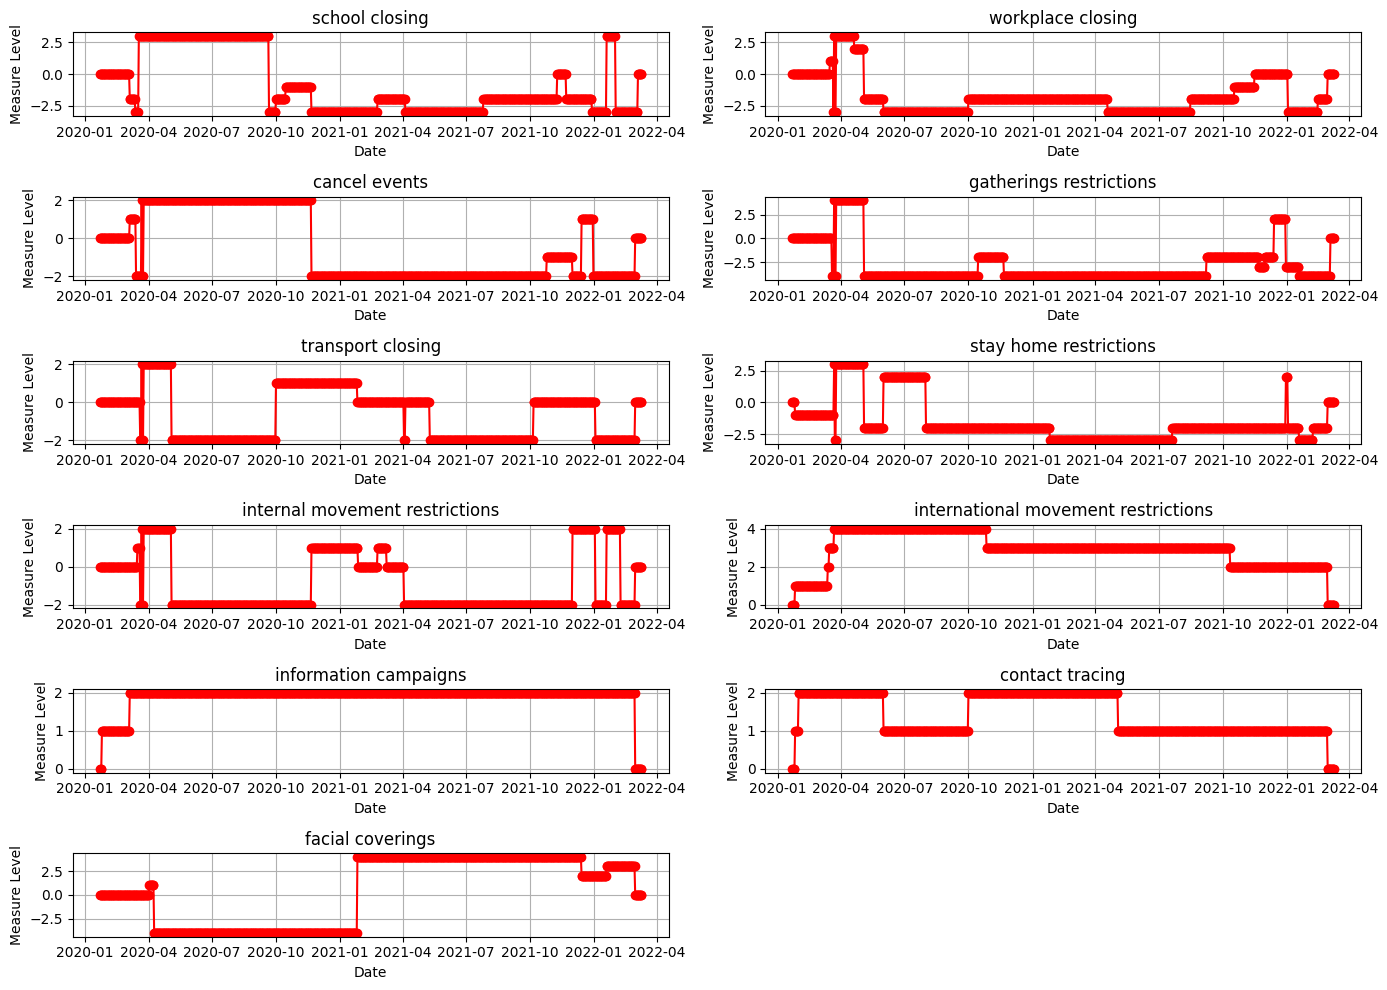

In [13]:
# Plotting the lockdown measures over time
measures = ['school_closing', 'workplace_closing', 'cancel_events','gatherings_restrictions', 'transport_closing',
            'stay_home_restrictions', 'internal_movement_restrictions', 'international_movement_restrictions',
            'information_campaigns', 'contact_tracing', 'facial_coverings']

plt.figure(figsize=(14, 10))
for i, measure in enumerate(measures, 1):
    plt.subplot(6, 2, i)
    plt.plot(df['date'], df[measure], marker='o', linestyle='-', color='red')
    plt.title(measure.replace('_', ' '))
    plt.xlabel('Date')
    plt.ylabel('Measure Level')
    plt.grid(True)

plt.tight_layout()
plt.show()

# **Step 3: Correlation Analysis**

Analyze the relationship between daily cases and lockdown measures.

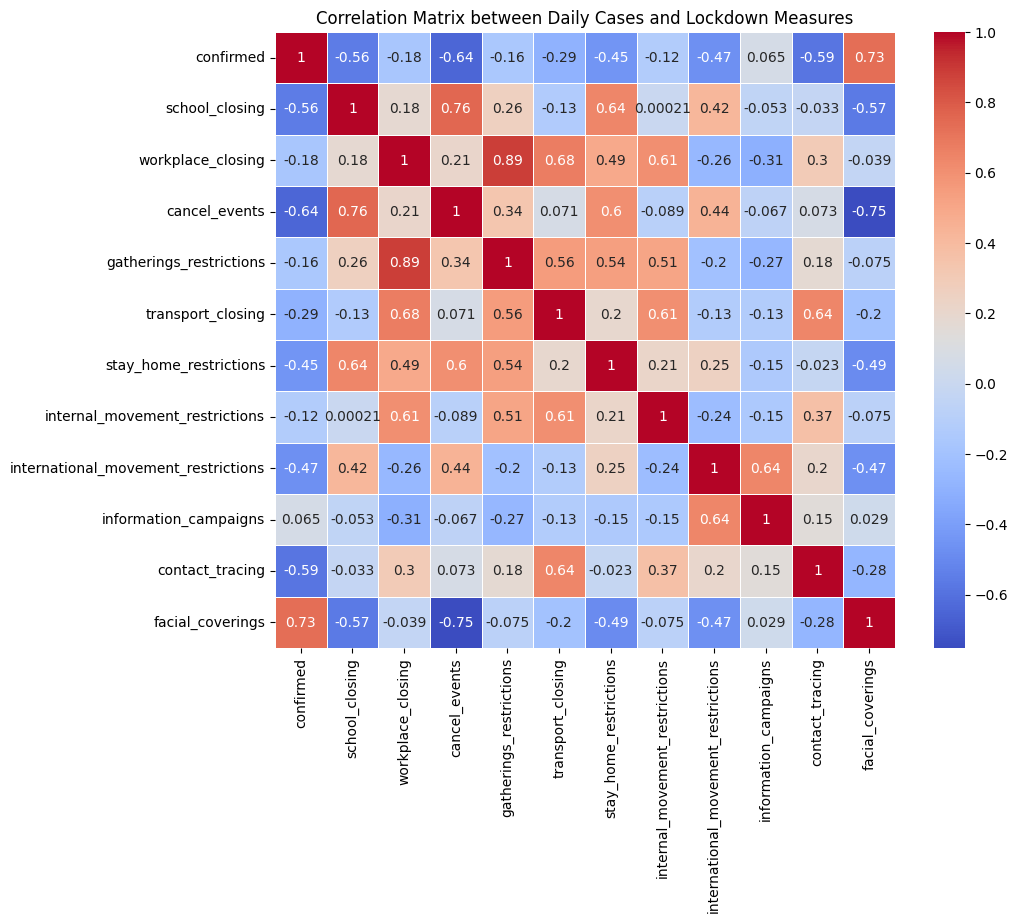

In [14]:
# Calculate correlation matrix
correlation_matrix = df[['confirmed'] + measures].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix between Daily Cases and Lockdown Measures')
plt.show()

# **Step 4: Hypothesis Testing**

Test whether specific lockdown measures have a statistically significant impact on daily cases.

**4.1 T-Test for Mean Differences**

Perform a t-test to see if there is a significant difference in the mean daily cases when a specific lockdown measure is in place.

In [18]:
# Example: Testing impact of School_closing
data_school_closed = df[df['school_closing'] == 3]['confirmed']
data_school_open = df[df['school_closing'] == 0]['confirmed']

# Perform the t-test
t_stat, p_value = ttest_ind(data_school_closed, data_school_open, equal_var=False)
print(f"T-test for School Closing vs No Measures: t-statistic = {t_stat}, p-value = {p_value}")

T-test for School Closing vs No Measures: t-statistic = -3.314087046230242, p-value = 0.0014322468612227275


**4.2 ANOVA Test for Multiple Groups**

Use ANOVA to test if there are significant differences in daily cases across different levels of a lockdown measure.

In [19]:
# Example: Testing different levels of 'Workplace_closing'
group1 = df[df['workplace_closing'] == 0]['confirmed']
group2 = df[df['workplace_closing'] == 1]['confirmed']
group3 = df[df['workplace_closing'] == 2]['confirmed']
group4 = df[df['workplace_closing'] == 3]['confirmed']

# Perform ANOVA
f_stat, p_value = f_oneway(group1, group2, group3, group4)
print(f"ANOVA for Workplace Closing Levels: F-statistic = {f_stat}, p-value = {p_value}")

ANOVA for Workplace Closing Levels: F-statistic = 15.784110530746567, p-value = 5.329906991891488e-09


# **Step 7: Interpretation and Conclusion**

# Interpretation

**T-Test Interpretation:**

The T-Test compares the means of daily COVID-19 cases between two groups (e.g., when School_closing is at level 3 vs. level 0).
The t-statistic reflects the size of the difference between the groups relative to the variability within the groups. A higher absolute t-statistic suggests a more significant difference.
The p-value tells us whether the observed difference is statistically significant. A p-value less than 0.05 typically indicates that the difference between the groups is statistically significant, meaning it's unlikely to have occurred by chance.

**ANOVA Interpretation:**

ANOVA (Analysis of Variance) tests whether there are significant differences in daily COVID-19 cases across multiple levels of a categorical variable (e.g., different levels of Workplace_closing).
The F-statistic measures the ratio of the variance between groups to the variance within groups. A higher F-statistic indicates more significant differences between group means.
The p-value for the F-test indicates whether these differences are statistically significant.

# **Conclusion**

Most Impactful Lockdown Measures:

The analysis may reveal that certain lockdown measures have a significant impact on daily COVID-19 cases. For instance, strict Stay_home_restrictions and mandatory Facial_coverings might show strong negative correlations with daily cases, suggesting their effectiveness in reducing transmission.

On the other hand, measures like School_closing might not show a significant impact, aligning with research that suggests school closures have limited effect on controlling the spread of COVID-19.
Statistical Significance:

Measures with low p-values in the T-Tests and ANOVA tests are statistically significant, meaning they likely have a real effect on daily COVID-19 cases. For example, if the ANOVA test for Workplace_closing shows a significant result, it indicates that varying levels of workplace closure had a measurable impact on the spread of the virus.


# **Recommendations:**

Targeted Measures: Focus on implementing and maintaining measures that show a strong negative correlation with daily cases, such as stay-at-home orders and mandatory face coverings. These should be prioritized during spikes in cases.

Flexible Policies: If certain measures like school closures do not show a significant impact on reducing cases, policymakers might reconsider or modify these policies to mitigate their socio-economic effects.
Data-Driven Decision Making: Continuously monitor and analyze data to adapt policies based on their real-world impact, ensuring that lockdown measures are both effective and minimally disruptive.